<h3  align="center">Random Forest Classifier</h3>

**Importing Essential Libraries**<br>
pandas for data handling and analysis.<br>
matplotlib.pyplot for creating plots and visualizations.<br>
numpy for numerical operations and handling arrays.

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

**Loading Dataset**

In [91]:
df=pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Checking for Null Values**

In [93]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Replacing Null Values**<br>
Replaces null values of ***Age*** column with 'mean' and ***Cabin*** and ***Embarked*** columns with mode values

In [95]:
df['Age']=df['Age'].fillna(df['Age'].mean())

In [96]:
df['Cabin']=df['Cabin'].fillna(df['Cabin'].mode()[0])

In [97]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [98]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Converting 'Pclass' Column to String**<br>
Converts the values in the 'Pclass' column of the DataFrame (df) to string type using the apply(str) method.

In [100]:
df['Pclass']=df['Pclass'].apply(str)

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    object 
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [102]:
df.dtypes[df.dtypes=='object'].index

Index(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

**Encoding Categorical Columns with Dummy Variables**<br>
Replaces categorical columns in the DataFrame with their respective one-hot encoded columns.

In [103]:
for col in df.dtypes[df.dtypes=='object'].index:
    dummy=df.pop(col)
    df=pd.concat([df,pd.get_dummies(dummy,prefix=col)],axis=1)
df.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,"Name_Abbing, Mr. Anthony",...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,1,0,22.0,1,0,7.2500,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
1,2,1,38.0,1,0,71.2833,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,3,1,26.0,0,0,7.9250,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
3,4,1,35.0,1,0,53.1000,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,5,0,35.0,0,0,8.0500,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True


**Separating Output column from dataframe**

In [105]:
label=df.pop('Survived')

In [106]:
df.head()

,PassengerId,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,"Name_Abbing, Mr. Anthony","Name_Abbott, Mr. Rossmore Edward",...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,1,22.0,1,0,7.2500,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
1,2,38.0,1,0,71.2833,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,3,26.0,0,0,7.9250,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
3,4,35.0,1,0,53.1000,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,5,35.0,0,0,8.0500,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True


**Splitting Dataset into training and testing datasets**<br>
Splitting Data into Training and Test Sets
This code splits the dataset (df) and corresponding labels (label) into training and test sets, with 25% of the data reserved for testing and 75% for training.

In [107]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df,label,test_size=0.25)

**Training a Random Forest Classifier**<br>
Initializes a RandomForestClassifier and fits it to the training data (X_train and y_train).

In [217]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

**Evaluating Model Accuracy**<br>
Calculates the accuracy of the trained Random Forest model on the test data (X_test and y_test).

In [220]:
model.score(X_test,y_test)

0.8340807174887892

**Tuning n_estimators for Random Forest**<br>
Evaluates the accuracy of a Random Forest model with different values of n_estimators (number of trees) by training the model on the training data and testing it on the test data. The accuracy scores for each value of n_estimators are stored in test_result.

In [231]:
n_estimators=[1,2,4,8,16,32,64,100,200]
test_result=[]
for estimate in n_estimators:
    model=RandomForestClassifier(n_estimators=estimate,n_jobs=1)
    model.fit(X_train,y_train)
    test_result.append(model.score(X_test,y_test))

**Plotting Test Accuracy vs. Number of Estimators**<br>
Plots a graph of the test accuracy (test_result) against the number of estimators (n_estimators) to visualize how the model's performance changes as the number of trees in the Random Forest increases.

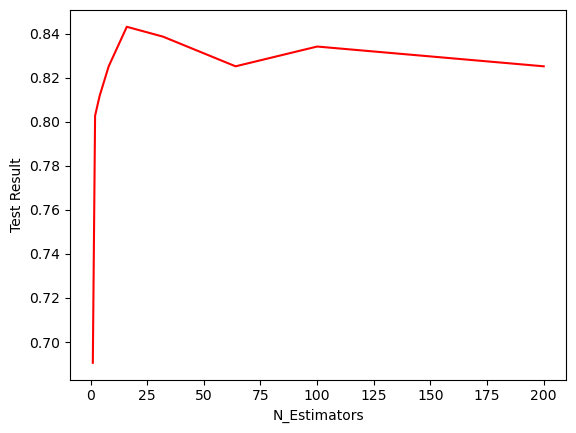

In [234]:
plt.plot(n_estimators,test_result,"r")
plt.xlabel("N_Estimators")
plt.ylabel("Test Result")
plt.show()